In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator
from math import pi
from random import randint
import numpy.random as rand
import matplotlib.colors as colors
cconverter=colors.ColorConverter()
from mpl_toolkits.mplot3d import Axes3D

In [2]:
r = 100
f_surface = .90
spot_ratio = .9

In [3]:
lat = np.linspace(-np.pi/2, np.pi/2, 60)
lon = np.linspace(-np.pi,   np.pi,  120)
x3d = r * np.outer(np.cos(np.pi+lon), np.sin(np.pi/2 + lat))
y3d = r * np.outer(np.sin(np.pi+lon), np.sin(np.pi/2 + lat))
z3d = r * np.outer(np.ones(np.size(lon)), np.cos(np.pi/2 + lat))

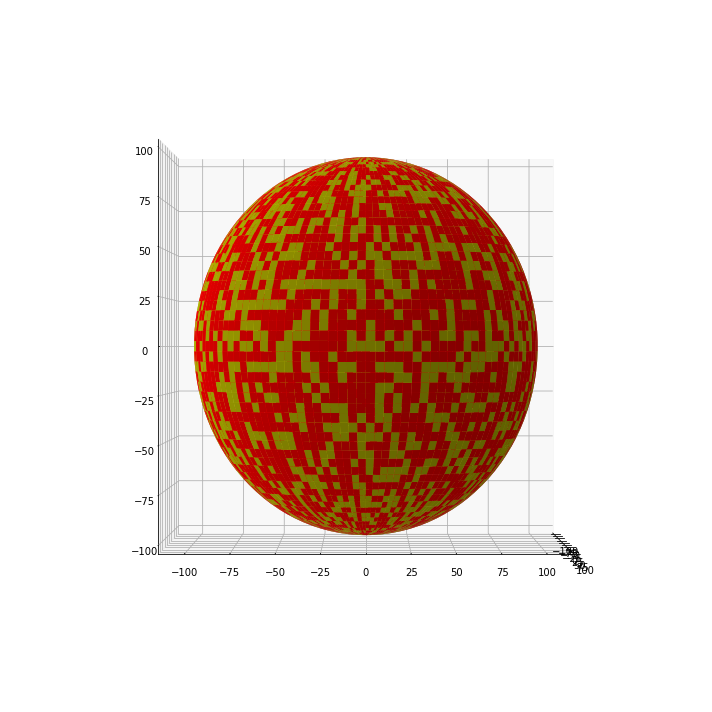

In [4]:
el_colors = np.full(x3d.shape, "y", dtype=str)
N_elems = len(lat)*len(lon)
N_spots = int(f_surface*N_elems)


for n in range(N_spots):
    x_spot = rand.randint(0, x3d.shape[0])
    y_spot = rand.randint(0, x3d.shape[1])
    
    el_colors[x_spot, y_spot] = "r"
    
fig = plt.figure(figsize=(10,10))

ax  = fig.add_subplot(111, projection="3d")

sp = ax.plot_surface(x3d, y3d, z3d, rstride=1, cstride=1, facecolors=el_colors, linewidth=0)

ax.view_init(azim=360,elev=0)

fig.tight_layout()

In [5]:
#xp  = r*np.sin(lon+np.pi/2)
#yp  = r*np.sin(lat)
#zp = 30
#for i in range(60):
#    for j in range(60):
#        if zp + i < xp.shape[0]:
#            k = zp + i
#        elif zp + i >= 120:
#            k = i - (xp.shape[0] - zp)
#        else:
#            print("Whoops")
#            break
#        pl=plt.plot(-xp[i], -yp[j], 's', ms = 8.0, c=specks[k, j][0])
#        plt.ylim(-r, r)
#        plt.xlim(-r, r)

In [6]:
brightness = []
rot_angle = np.linspace(0, 2 * np.pi, 120)

for zp in range(120):
    phi_0 = lon[zp]
    phi = np.linspace(phi_0 - np.pi/2, phi_0 + np.pi/2, 60)
    x = r * np.sin(phi - phi[0] - np.pi/2)
    y = r * np.sin(lat)
    
    dx = []
    dy = []
    
    spot_data = []
    df = []
    
    for q in range(len(x)-1):
        dx.append(np.absolute(x[q]-x[q+1]))
    for q in range(len(y)-1):
        dy.append(np.absolute(y[q]-y[q+1]))
    
    for i in range(len(dx)):
        k = zp -30 +i
        if (zp - 30 + i) < 0:
            k = 119 + (zp-30+i)
        elif (zp - 30 + i) > 119: 
            k = (zp -30 +i) - 119
        else:
            k = zp - 30 + i

        for j in range(len(dy)):
            dA = dx[i]*dy[j]
            if el_colors[k,j] == "r":
                df.append((spot_ratio**4)*dA)
            else:
                df.append(dA)
                           
    brightness.append(sum(df))

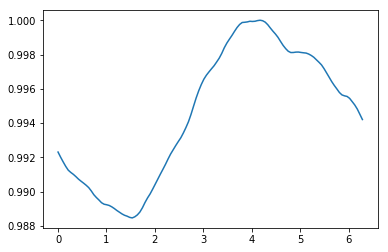

In [7]:
fig = plt.plot(rot_angle,brightness/max(brightness))